<a href="https://colab.research.google.com/github/imranrahman1997/Neural-Network-from-scratch/blob/main/Uses_of_data_augmentation_in_dogs_vs_cats_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Use a pretrained model

In [49]:
from keras.applications import VGG16

In [51]:
conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [52]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

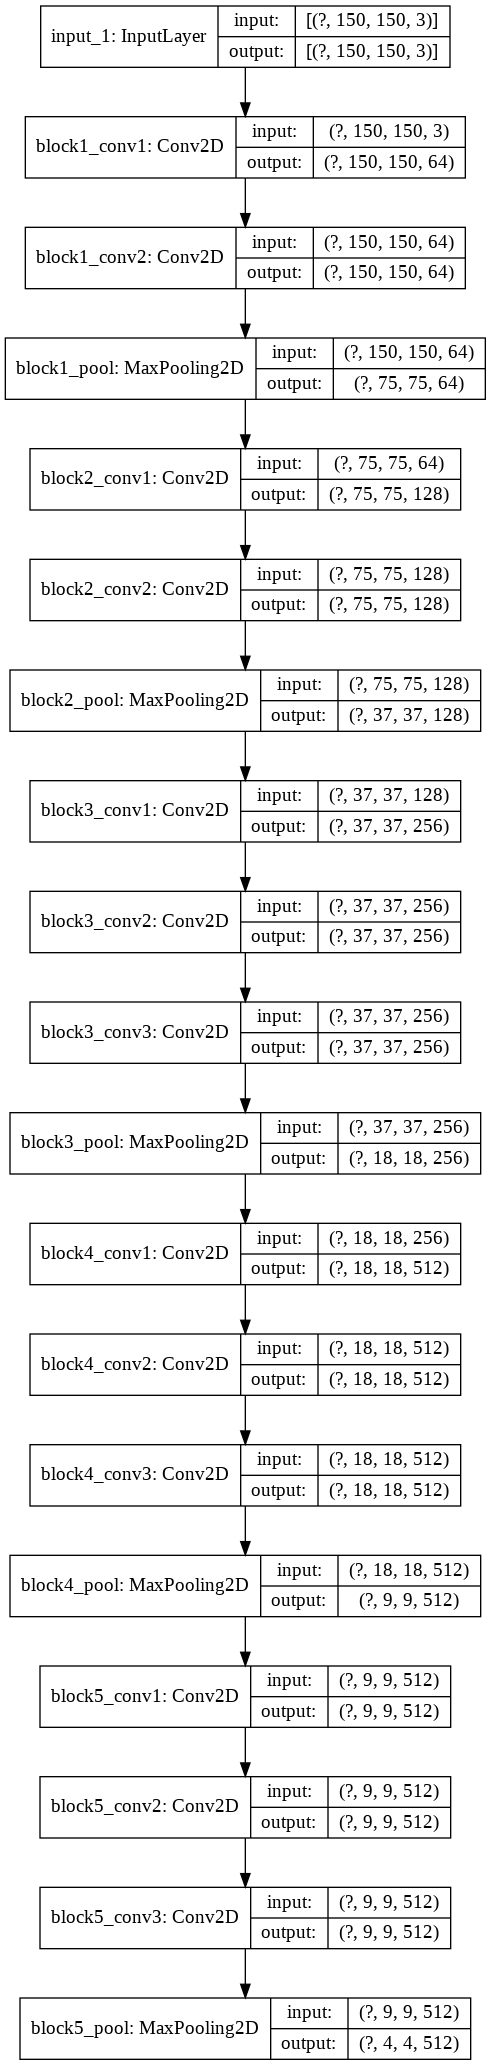

In [53]:
plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [54]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


#Freez layers  
Before you compile and train the model, it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.  
**In Keras, you freeze a network by setting its trainable attribute to False:**

In [56]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [57]:
conv_base.trainable = False

In [58]:
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [59]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [60]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [61]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [62]:
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [63]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

In [64]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 203ms/step - loss: 0.5967 - acc: 0.6740 - val_loss: 0.4517 - val_acc: 0.8220
Epoch 2/30
100/100 [==============================] - 20s 203ms/step - loss: 0.4945 - acc: 0.7690 - val_loss: 0.3779 - val_acc: 0.8540
Epoch 3/30
100/100 [==============================] - 20s 203ms/step - loss: 0.4327 - acc: 0.8110 - val_loss: 0.3261 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 20s 201ms/step - loss: 0.3900 - acc: 0.8230 - val_loss: 0.3111 - val_acc: 0.8620
Epoch 5/30
100/100 [==============================] - 20s 203ms/step - loss: 0.3803 - acc: 0.8360 - val_loss: 0.2858 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 20s 202ms/step - loss: 0.3643 - acc: 0.8445 - val_loss: 0.2769 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 20s 203ms/step - loss: 0.3649 - acc: 0.8490 - val_loss: 0.2752 - val_acc: 0.8890
Epoch 8/30
100/100 [==============================] - 2

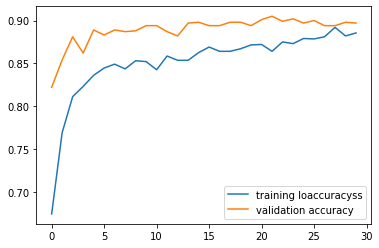

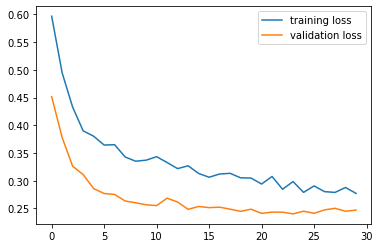

In [66]:
plt.plot(history.history['acc'], label = 'training loaccuracyss')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

#Fine Tuning

In [68]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We need to freez upto block 4  
Freezing all layers up to a specific one

In [69]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [71]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

In [73]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 19s 190ms/step - loss: 0.2844 - acc: 0.8735 - val_loss: 0.2243 - val_acc: 0.9080
Epoch 2/30
100/100 [==============================] - 19s 186ms/step - loss: 0.2648 - acc: 0.8810 - val_loss: 0.2177 - val_acc: 0.9080
Epoch 3/30
100/100 [==============================] - 19s 187ms/step - loss: 0.2214 - acc: 0.9125 - val_loss: 0.2072 - val_acc: 0.9110
Epoch 4/30
100/100 [==============================] - 19s 188ms/step - loss: 0.2091 - acc: 0.9095 - val_loss: 0.2180 - val_acc: 0.9180
Epoch 5/30
100/100 [==============================] - 19s 189ms/step - loss: 0.1959 - acc: 0.9215 - val_loss: 0.2115 - val_acc: 0.9240
Epoch 6/30
100/100 [==============================] - 19s 188ms/step - loss: 0.2086 - acc: 0.9130 - val_loss: 0.2057 - val_acc: 0.9260
Epoch 7/30
100/100 [==============================] - 19s 186ms/step - loss: 0.1966 - acc: 0.9265 - val_loss: 0.2208 - val_acc: 0.9170
Epoch 8/30
100/100 [==============================] - 1

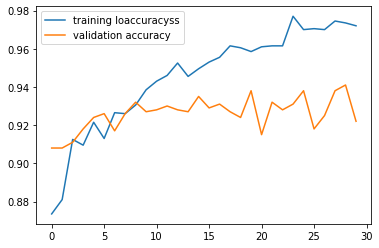

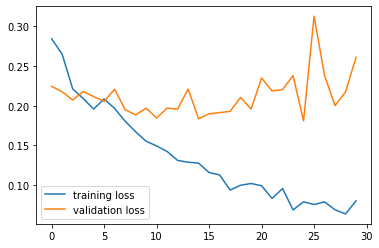

In [74]:
plt.plot(history.history['acc'], label = 'training loaccuracyss')
plt.plot(history.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

In [75]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 1000 images belonging to 2 classes.


In [76]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.9279999732971191
